# ライブラリ

In [753]:
import pandas as pd
import datetime

import numpy as np
import scipy as sp
import statistics
from scipy.stats import variation

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import plotly
import plotly.graph_objects as go
import plotly.express as px

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score

import bar_chart_race as bcr

In [754]:
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

# データ
* draft_year → ドラフト年
* draft_round　→ ドラフト順番
* draft_number ドラフト番号

In [755]:
df = pd.read_csv("DATA/NBA.csv",index_col=0)
pd.set_option('display.max_columns',22)
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [756]:
df.query('player_name == "Michael Jordan"')

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
47,Michael Jordan,CHI,34.0,198.12,97.975872,North Carolina,USA,1984,1,3,82,29.6,5.9,4.3,13.4,0.042,0.132,0.331,0.567,0.208,1996-97
854,Michael Jordan,CHI,35.0,198.12,97.975872,North Carolina,USA,1984,1,3,82,28.7,5.8,3.5,8.5,0.047,0.125,0.336,0.533,0.174,1997-98
2422,Michael Jordan,WAS,39.0,198.12,97.975872,North Carolina,USA,1984,1,3,60,22.9,5.7,5.2,-0.3,0.027,0.163,0.361,0.468,0.295,2001-02
2649,Michael Jordan,WAS,40.0,198.12,97.975872,North Carolina,USA,1984,1,3,82,20.0,6.1,3.8,0.0,0.028,0.167,0.288,0.491,0.207,2002-03


In [757]:
df.query('player_name == "Kobe Bryant"')

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
96,Kobe Bryant,LAL,18.0,200.66,90.718400,None,USA,1996,1,13,71,7.6,1.9,1.3,2.2,0.048,0.084,0.244,0.544,0.144,1996-97
780,Kobe Bryant,LAL,19.0,200.66,95.254320,None,USA,1996,1,13,79,15.4,3.1,2.5,6.9,0.044,0.088,0.268,0.548,0.165,1997-98
1284,Kobe Bryant,LAL,20.0,200.66,97.522280,None,USA,1996,1,13,50,19.9,5.3,3.8,2.8,0.033,0.128,0.254,0.549,0.176,1998-99
1421,Kobe Bryant,LAL,21.0,200.66,95.254320,None,USA,1996,1,13,66,22.5,6.3,4.9,10.4,0.046,0.128,0.266,0.546,0.215,1999-00
1933,Kobe Bryant,LAL,22.0,200.66,95.254320,None,USA,1996,1,13,68,28.5,5.9,5.0,6.3,0.042,0.117,0.315,0.552,0.220,2000-01
2459,Kobe Bryant,LAL,23.0,200.66,95.254320,None,USA,1996,1,13,80,25.2,5.5,5.5,7.6,0.041,0.118,0.304,0.544,0.254,2001-02
2716,Kobe Bryant,LAL,24.0,200.66,97.522280,None,USA,1996,1,13,82,30.0,6.9,5.9,3.7,0.035,0.152,0.329,0.550,0.268,2002-03
3139,Kobe Bryant,LAL,25.0,198.12,99.790240,None,USA,1996,1,13,65,24.0,5.5,5.1,6.2,0.047,0.119,0.286,0.551,0.237,2003-04
3571,Kobe Bryant,LAL,26.0,198.12,99.790240,None,USA,1996,1,13,66,27.6,5.9,6.0,-2.2,0.040,0.125,0.316,0.563,0.287,2004-05
4348,Kobe Bryant,LAL,27.0,198.12,99.790240,None,USA,1996,1,13,80,35.4,5.3,4.5,4.7,0.026,0.127,0.384,0.559,0.228,2005-06


In [758]:
df['season'].unique()

array(['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02',
       '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20',
       '2020-21'], dtype=object)

## データを把握

In [759]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [760]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11700 entries, 0 to 11699
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11700 non-null  object 
 1   team_abbreviation  11700 non-null  object 
 2   age                11700 non-null  float64
 3   player_height      11700 non-null  float64
 4   player_weight      11700 non-null  float64
 5   college            11700 non-null  object 
 6   country            11700 non-null  object 
 7   draft_year         11700 non-null  object 
 8   draft_round        11700 non-null  object 
 9   draft_number       11700 non-null  object 
 10  gp                 11700 non-null  int64  
 11  pts                11700 non-null  float64
 12  reb                11700 non-null  float64
 13  ast                11700 non-null  float64
 14  net_rating         11700 non-null  float64
 15  oreb_pct           11700 non-null  float64
 16  dreb_pct           117

In [762]:
# 25シーズンの間に2233人のNBAプレーヤーなしかいません。 
# NBAは競争力があるとわかります。
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

,player_name,team_abbreviation,college,country,draft_year,draft_round,draft_number,season
count,11700,11700,11700,11700,11700,11700,11700,11700
unique,2333,36,336,79,46,9,76,25
top,Vince Carter,CLE,None,USA,Undrafted,1,Undrafted,2020-21
freq,22,411,1715,9836,2057,6792,2096,540


## データを整理

### 欠損を確認

In [763]:
df.isnull().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

### year

In [764]:
# Undrafted = NaN
df['drafted'] = np.where(df['draft_year'] != 'Undrafted', 1, 0)
df['draft_year'] = df['draft_year'].replace(r'Undrafted', np.nan, regex=True)
# 日付の扱う
df['draft_year'] = pd.to_datetime(df['draft_year'])
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996-01-01,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,1
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992-01-01,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,1
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,NaT,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,0
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,NaT,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,0
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996-01-01,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,1


### season

In [765]:
df['season'] = pd.to_datetime(df['season'].str[:4])
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996-01-01,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-01-01,1
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992-01-01,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-01-01,1
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,NaT,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-01-01,0
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,NaT,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-01-01,0
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996-01-01,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-01-01,1


### country

In [766]:
df["country"].unique()

array(['USA', 'Jamaica', 'Serbia and Montenegro', 'Ukraine', 'Canada',
       'Croatia', 'Lithuania', 'Nigeria', 'Congo',
       'St. Vincent & Grenadines', 'US Virgin Islands', 'France',
       'Slovenia', 'Dominican Republic', 'Germany', 'Georgia',
       'New Zealand', 'Belize', 'England', 'Argentina',
       'U.S. Virgin Islands', 'Greece', 'Senegal', 'China', 'Turkey',
       'Finland', 'Mali', 'Puerto Rico', 'Mexico', 'Yugoslavia', 'Serbia',
       'Spain', 'Venezuela', 'Haiti', 'Russia', 'Ireland', 'Brazil',
       'Scotland', 'Poland', 'Netherlands', 'Czech Republic',
       'Montenegro', 'United Kingdom', 'Democratic Republic of the Congo',
       'Latvia', 'South Korea', 'Uruguay', 'Sudan (UK)', 'Australia',
       'USSR', 'Italy', 'Switzerland', 'Gabon', 'Cameroon', 'Iran',
       'Israel', 'Sweden', 'Tanzania', 'Panama', 'Bosnia',
       'Great Britain', 'Macedonia', 'Bosnia & Herzegovina', 'Cabo Verde',
       'Tunisia', 'South Sudan', 'Bahamas', 'Ghana', 'Austria',
      

In [767]:
# 国を整理する
df['country'] = df['country'].replace({'Great Britain':'United Kingdom','England':'United Kingdom','Scotland':'United Kingdom',
                                       'Bosnia & Herzegovina':'Bosnia and Herzegovina','Bosnia':'Bosnia and Herzegovina',
                                       'Cabo Verde':'Cape Verde','St. Vincent & Grenadines':'Saint Vincent and Grenadines'})
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996-01-01,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-01-01,1
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992-01-01,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-01-01,1
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,NaT,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-01-01,0
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,NaT,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-01-01,0
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996-01-01,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-01-01,1


# 統計学

## 🔴関係係数

<AxesSubplot:>

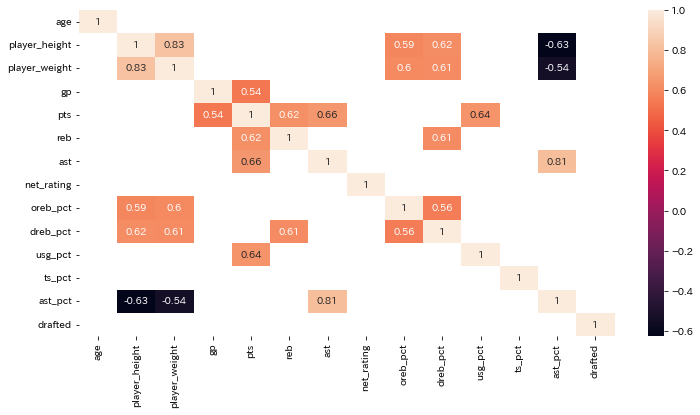

In [768]:
#　0.5を超える
plt.figure(figsize=(12,6))
corr = df.corr()
corr = corr[abs(corr) > 0.5]
sns.heatmap(corr, annot=True)

* dreb_pctとoreb_pctは、player_heightと強い正の相関関係があります。
* 背の高いプレーヤーはより多くのリバウンドを取得します。

* player_heightとast_pctは負の相関関係にあります。
* ガードがほとんどボールを処理するため、短いプレーヤーはアシスト率が高くなる傾向があります。

* ptsとastは正の相関関係にあります。
* 得点できるプレーヤーがチームメートにボールを皿に盛ることもできる可能性が高くなります。


# 身長と体重

## 俯瞰

In [769]:
main_variables = df.groupby('player_name', as_index=False).agg({'player_height': 'mean', 'player_weight':'mean'})
main_variables.head()

,player_name,player_height,player_weight
0,A.C. Green,205.74,102.058200
1,A.J. Bramlett,208.28,102.965384
2,A.J. Guyton,185.42,81.646560
3,AJ Hammons,213.36,117.933920
4,AJ Price,187.96,84.821704


/Users/ginho/opt/anaconda3/envs/MyEnv01/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



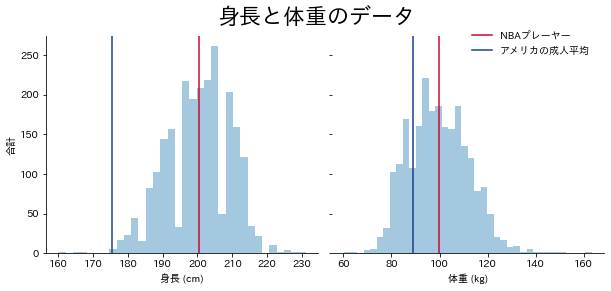

In [770]:
fig, ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
plt.subplots_adjust(wspace=0.05)
sns.distplot(main_variables ['player_height'], ax=ax[0], label='_nolegend_', kde=False)
sns.distplot(main_variables ['player_weight'], ax=ax[1], label='_nolegend_', kde=False)
ax[0].axvline(main_variables ['player_height'].mean(), color='#c9082a', label='NBAプレーヤー')
ax[1].axvline(main_variables ['player_weight'].mean(), color='#c9082a', label='NBAプレーヤー')
# アメリカの成人平均を追加
ax[0].axvline(175.3, color='#17408b', label='アメリカの成人平均')
ax[1].axvline(88.8, color='#17408b', label='アメリカの成人平均')

ax[0].yaxis.set_label_text('合計')
ax[0].xaxis.set_label_text('身長 (cm)')
ax[1].xaxis.set_label_text('体重 (kg)')
plt.suptitle('身長と体重のデータ', fontsize=22)
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 1.06), frameon=False)
sns.despine(ax=ax[1], left=True)
sns.despine(ax=ax[0])
plt.show()

* 🔴NBAプレーヤーより普通のアメリカ成人身長が高いことが分かります。

In [771]:
fig = go.Figure(data=go.Scatter(x=main_variables['player_weight'],
                                y=main_variables['player_height'],
                                mode='markers',
                                text=main_variables['player_name'],
                                marker=dict(color='#17408b')))
fig.update_layout(
    title='NBAプレーヤーの身長と体重',
    xaxis_title='体重 (kg)',
    yaxis_title='身長 (cm)',
    plot_bgcolor='rgba(0,0,0,0)',
    width=600, height=400)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='black')
fig.show()

* 🔴身長が一番高いはGheorghe Muresanです（231.14cm）
* 身長が一番低いはMuggsy Boguesです（160.02cm）
* 体重が一番重いはSim Bhullarです（163kg）
* 体重が一番重いはSpud Webbです（60kg）

### 🔴身長と体重の関係

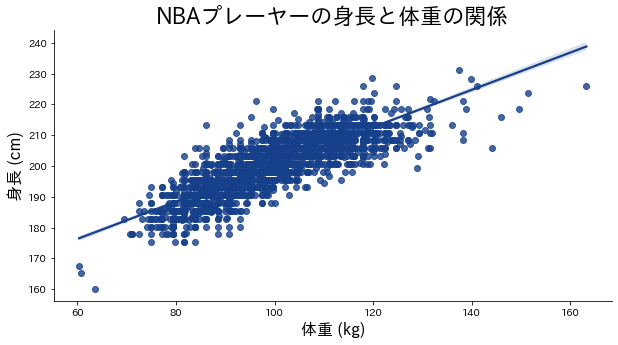

In [772]:
plt.figure(figsize=(10, 5))
sns.regplot(x='player_weight', y='player_height', data=main_variables, color='#17408b')
plt.title('NBAプレーヤーの身長と体重の関係', fontsize=22)
plt.ylabel('身長 (cm)',fontsize=16)
plt.xlabel('体重 (kg)',fontsize=16)
sns.despine()
plt.show()

#### 相関係数

In [773]:
# 身長と体重の関係が強い
corr = stats.pearsonr(main_variables['player_height'], main_variables['player_weight'])
print(f"相関係数: {corr[0]}. P値 {corr[1]}")

相関係数: 0.825004055264172. P値 0.0


#### シーズンより

In [774]:
corr_over_seasons = df.groupby('season')[['player_weight','player_height']].corr().unstack().iloc[:,1]
fig = go.Figure()
fig.add_trace(go.Scatter(x=corr_over_seasons.index, 
                         y=corr_over_seasons.values,
                         mode='lines',
                         name='lines',
                         line=dict(color='#17408b')))
fig.update_layout(
    title='シーズンより身長と体重の関係',
    xaxis_title='シーズン',
    yaxis_title='関係',
    plot_bgcolor='rgba(0,0,0,0)',
    width=600, height=400)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='black')
fig.show()

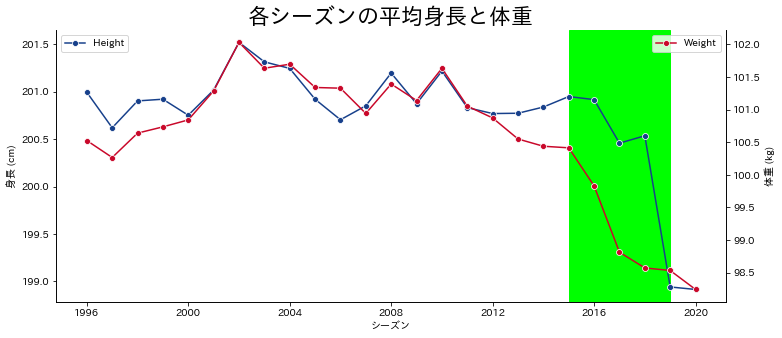

In [775]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
sns.lineplot(x=df['season'], y='player_height', data=df, marker="o", ax=ax, ci=None, label='Height', color='#17408b')
sns.lineplot(x=df['season'], y='player_weight', data=df, marker="o", ax=ax2, ci=None, label='Weight', color='#c9082a')

plt.title('各シーズンの平均身長と体重', fontsize=22)

start_datetime = datetime.datetime(2015,1,1)
end_datetime = datetime.datetime(2019,1,1)
ax.axvspan(start_datetime, end_datetime, color = "lime")
ax.xaxis.set_label_text('シーズン')
ax.yaxis.set_label_text('身長 (cm)')
ax2.yaxis.set_label_text('体重 (kg)')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.show()

* 🔴関係が減っています。

### 🔴BMIの計算

In [776]:
df['bmi'] = df['player_weight'].values / (df['player_height'].values ** 2) * 10000
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted,bmi
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996-01-01,1,29,71,...,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-01-01,1,23.415705
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992-01-01,2,50,6,...,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-01-01,1,23.983338
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,NaT,Undrafted,Undrafted,71,...,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-01-01,0,24.571864
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,NaT,Undrafted,Undrafted,74,...,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-01-01,0,25.003906
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996-01-01,1,25,42,...,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-01-01,1,25.182322


In [777]:
fig = go.Figure(data=go.Scatter(x=df['bmi'],
                                y=df['player_height'],
                                mode='markers',
                                text=df['player_name'],
                                marker=dict(color='#17408b')))
fig.update_layout(
    title='NBAプレーヤーの身長とBMI',
    xaxis_title='BMI',
    yaxis_title='身長 (cm)',
    plot_bgcolor='rgba(0,0,0,0)',
    width=600, height=400)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='black')
fig.show()

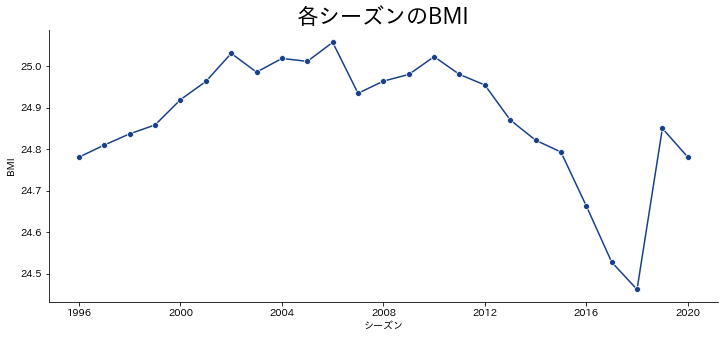

In [778]:
plt.figure(figsize=(12,5))
sns.lineplot(x=df['season'], y='bmi', data=df, marker="o", ci=None, color='#17408b')
plt.title('各シーズンのBMI', fontsize=22)
plt.ylabel('BMI')
plt.xlabel('シーズン')
sns.despine()
plt.show()

* 2019年はBMIの減少傾向の外れ値のようです。
* そこで、BMIが最も高い上位10人のプレーヤーを表示して、もう少し詳しく調べてみましょう。

In [779]:
season_BMI_2019 = df[df['season'] == '2019']
season_BMI_2019[['player_name','bmi']].sort_values(by='bmi',ascending=False)[:10]

,player_name,bmi
10989,Zion Williamson,32.819132
10756,Jarrell Brantley,29.645345
10689,Eric Paschall,29.467882
10848,Deonte Burton,29.213394
10812,Andre Drummond,29.172554
10933,P.J. Tucker,29.052438
10943,Paul Millsap,28.951888
10974,Wendell Carter Jr.,28.932881
11079,Jusuf Nurkic,28.895977
10799,Admiral Schofield,28.578113


### 🔴ドラフト年より身長と体重

/var/folders/zf/jcszxh8555z_p9pqg0jz5mp00000gn/T/ipykernel_36288/1498867972.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



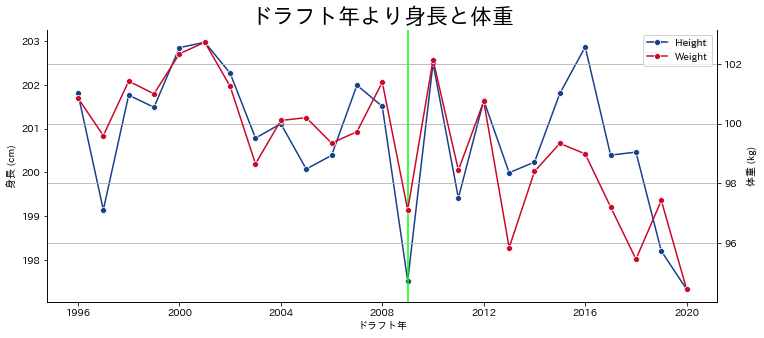

In [780]:
first_season_drafted = df.query('season == draft_year')
h_w_by_draft_year = first_season_drafted.groupby('draft_year')['player_height', 'player_weight'].mean()

fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
sns.lineplot(x=h_w_by_draft_year.index, y='player_height', data=h_w_by_draft_year, marker="o", ax=ax, ci=None, label='Height', color='#17408b')
sns.lineplot(x=h_w_by_draft_year.index, y='player_weight', data=h_w_by_draft_year, marker="o", ax=ax2, ci=None, label='Weight', color='#c9082a')
plt.title('ドラフト年より身長と体重', fontsize=22)
start_datetime = datetime.datetime(2009,1,1)
ax.axvline(start_datetime, color = "lime")
ax.xaxis.set_label_text('ドラフト年')
ax.yaxis.set_label_text('身長 (cm)')
ax2.yaxis.set_label_text('体重 (kg)')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.grid()
plt.show()

### ドラフト年よりBMI

/var/folders/zf/jcszxh8555z_p9pqg0jz5mp00000gn/T/ipykernel_36288/2545072873.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



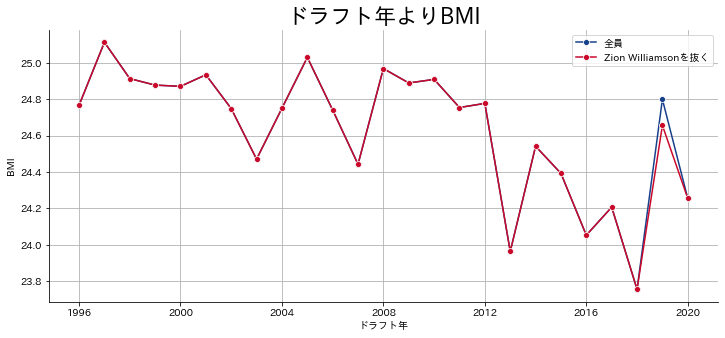

In [781]:
bmi_draft = h_w_by_draft_year['player_weight'] / (h_w_by_draft_year['player_height'] ** 2) * 10000
bmi_draft = pd.DataFrame(bmi_draft, columns=['bmi'])
# Zion Williamsonを抜く
first_season_drafted_nz = first_season_drafted[first_season_drafted['player_name'] != 'Zion Williamson']
# 平均
h_w_by_draft_year_nz = first_season_drafted_nz.groupby('draft_year')['player_height', 'player_weight'].mean()
bmi_draft_nz = h_w_by_draft_year_nz['player_weight'] / (h_w_by_draft_year_nz['player_height'] ** 2) * 10000
bmi_draft_nz = pd.DataFrame(bmi_draft_nz, columns=['bmi'])

plt.figure(figsize=(12, 5))
sns.lineplot(x=bmi_draft.index, y=bmi_draft['bmi'], data=bmi_draft, marker="o", color='#17408b',label='全員')
sns.lineplot(x=bmi_draft_nz.index, y=bmi_draft_nz['bmi'], data=bmi_draft, marker="o", color='#c9082a',label='Zion Williamsonを抜く')
plt.title('ドラフト年よりBMI', fontsize=22)
plt.ylabel('BMI')
plt.xlabel('ドラフト年')
plt.legend()
plt.grid()
sns.despine()
plt.show()

### 🔴年齢と体重の関係

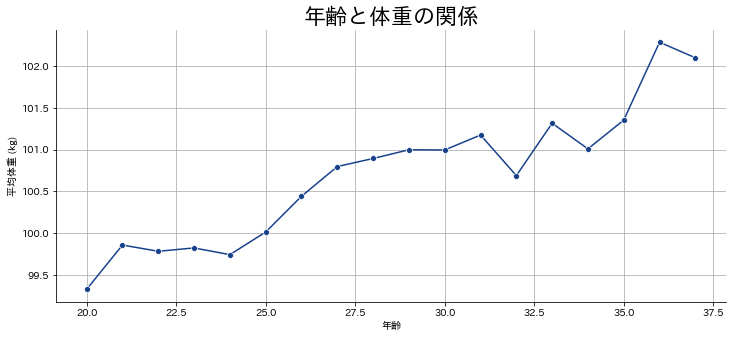

In [782]:
plt.figure(figsize=(12, 5))
w_by_age = df.groupby(['age'])['player_weight'].agg(['mean', 'count'])
w_by_age['outliers'] = np.where(w_by_age['count']<=100, 1, 0)
w_by_age = w_by_age.loc[w_by_age['outliers']==0]

sns.lineplot(x=w_by_age.index, y='mean', data=w_by_age, marker='o', color='#17408b')
plt.title('年齢と体重の関係', fontsize=22)
plt.ylabel('平均体重 (kg)')
plt.xlabel('年齢')
sns.despine()
plt.grid()
plt.show()

## 地域より

In [783]:
country_codes = pd.read_csv("DATA/country_code.csv", index_col=0)
country_codes.head()

,Country_name,code_2digit,code_3digit
2,Afghanistan,AF,AFG
3,Aland Islands,AX,ALA
4,Albania,AL,ALB
5,Algeria,DZ,DZA
6,American Samoa,AS,ASM


In [784]:
country_codes = country_codes[['Country_name', 'code_3digit']]
country_codes = country_codes.rename({'Country_name': 'country'}, axis=1) 
country_codes['country'] = country_codes['country'].replace({'United States of America': 'USA', 'Russian Federation':'Russia',
                                                             'Venezuela (Bolivarian Republic)':'Venezuela', 'Korea (South)':'South Korea',
                                                             'Tanzania, United Republic of':'Tanzania','Macedonia, Republic of':'Macedonia',
                                                             'Congo, (Kinshasa)':'Democratic Republic of the Congo',
                                                             'Congo (Brazzaville)':'Congo','Iran, Islamic Republic of':'Iran',
                                                             'Virgin Islands, US':'US Virgin Islands',
                                                             })
country_codes.head()

,country,code_3digit
2,Afghanistan,AFG
3,Aland Islands,ALA
4,Albania,ALB
5,Algeria,DZA
6,American Samoa,ASM


In [785]:
# NBAに参加した時のプレーヤーの身長と体重
relevant_fields = df[['player_name', 'player_height', 'player_weight', 'country', 'season']]
player_first_season = relevant_fields.loc[relevant_fields.groupby(['player_name']).season.idxmin()]
# 各国のプレーヤーの数を数えます
df_geography = player_first_season.groupby('country', as_index=False).agg(
                                                                          {'player_height': 'mean', 'player_weight':'mean', 'player_name':'count'}
                                                                          ).rename({'player_name': 'count'}, axis=1) 
# ３人以上を設定する
#df_geography = df_geography[df_geography['count'] >= 3]
# 国コードを追加する
df_geography = pd.merge(df_geography, country_codes, how='inner', on='country').sort_values(by=["count"], ascending=False)
df_geography.head()

,country,player_height,player_weight,count,code_3digit
61,USA,199.446173,98.331341,1970,USA
9,Canada,201.748571,101.721246,35,CAN
19,France,201.889032,98.136824,31,FRA
2,Australia,202.602353,102.218291,17,AUS
13,Croatia,209.126667,103.388737,15,HRV


#### 🔴地図

In [786]:
# 身長
height_map = go.Choropleth(
    locations = df_geography['code_3digit'],
    z = df_geography['player_height'],
    text = df_geography['country'],
    colorscale = 'Blues',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '身長(cm)')
# 体重
weight_map = go.Choropleth(
    locations = df_geography['code_3digit'],
    z = df_geography['player_weight'],
    text = df_geography['country'],
    colorscale = 'Blues',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = '体重(kg)',
    visible=False)
data = [height_map, weight_map]
# 地図を作る
updatemenus = list([
    dict(type="buttons",y=0.7,
         buttons=list([dict(label = '身長 Map',
                            method = 'update',
                            args = [{'visible': [True, False]},
                                    {'title': '国別の平均NBAプレーヤーの身長'}]),
                       dict(label = '体重 Map',
                            method = 'update',
                            args = [{'visible': [False, True]},
                                    {'title': '国別の平均NBAプレーヤーの体重'}])]),)])
layout = dict(updatemenus=updatemenus,title_text='国別の平均NBAプレーヤーの身長',
              geo=dict(showframe=False,showcoastlines=False,projection_type='equirectangular'),
              margin=dict(l=0, r=0, b=0),width=600,height=400)
fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)

## 🔴表現に対する身長と体重の影響

/var/folders/zf/jcszxh8555z_p9pqg0jz5mp00000gn/T/ipykernel_36288/1326165598.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



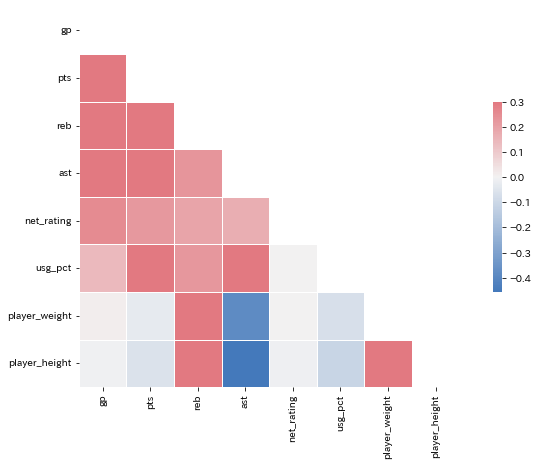

In [787]:
# 2019-01-01前にを設定する
df_corr = df[df['season'] != '2019-01-01']
df_corr = df[['gp','pts','reb','ast','net_rating','usg_pct','player_weight', 'player_height']]
# 関係行列
corr = df_corr.corr()
# 上の三角形のマスクを作る
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12,7))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
# ヒートマップ
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

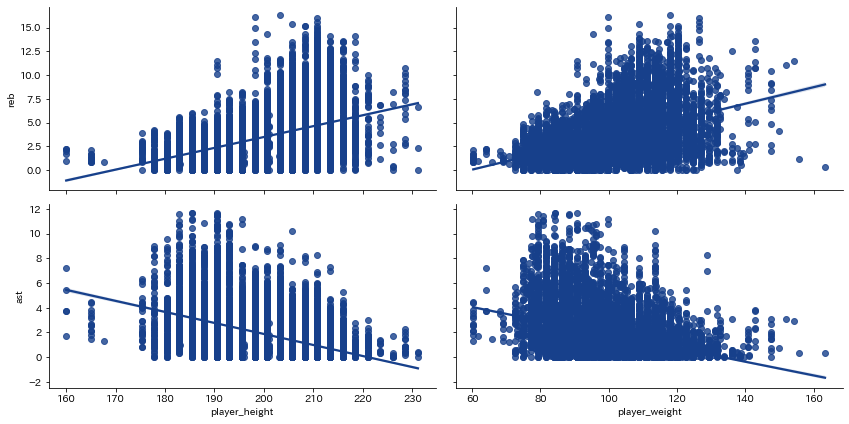

In [788]:
g = sns.PairGrid(df_corr, y_vars=['reb','ast'], x_vars=["player_height", "player_weight"], height=3, aspect=2)
g.map(sns.regplot, color='#17408b')
plt.show()

* 身長も体重も、プレイしたゲームの総数と得点の平均に大きな影響を与えていないようです。
* ただし、予想通り、身長と体重は平均astとrebの統計に影響を与えます。

In [789]:
# 身長とrebとast
corr_h_r = df.groupby('season')[['player_height','reb']].corr().unstack().iloc[:,1]
corr_h_a = df.groupby('season')[['player_height','ast']].corr().unstack().iloc[:,1]
# 体重とrebとast
corr_w_r = df.groupby('season')[['player_weight','reb']].corr().unstack().iloc[:,1]
corr_w_a = df.groupby('season')[['player_weight','ast']].corr().unstack().iloc[:,1]

In [790]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=corr_w_r.index, y=corr_w_r.values,
                         mode='lines',name='体重 と リバウンド'))
fig.add_trace(go.Scatter(x=corr_w_a.index, y=corr_w_a.values,
                         mode='lines',name='体重 と アシスト'))
fig.add_trace(go.Scatter(x=corr_h_r.index, y=corr_h_r.values,
                         mode='lines',name='身長 と リバウンド'))
fig.add_trace(go.Scatter(x=corr_h_a.index, y=corr_h_a.values,
                         mode='lines',name='身長 と アシスト'))
fig.update_layout(
    title='時間の経過に伴う相関係数の比較',
    xaxis_title='シーズン',
    yaxis_title='係数',
    plot_bgcolor='rgba(0,0,0,0)')
fig.show()

* 🔴リバウンド係数は安定しています。 
* ただし、アシストの負の相関関係（プレーヤーが高いまたは重いほど、アシストは少なくなります）は、2011年以降減少しています。
* これは、ゲームがどのように変化し、身長が高いプレーヤーがチームの全体的に不可欠になっていることを示しています。

### 体重の変化

In [791]:

# 年齢別の各プレーヤーの体重変化率の値を計算する
w_pct_change = df.groupby(['season', 'player_name'], as_index=False)['player_weight'].mean().sort_values(['player_name', 'season'])
w_pct_change_values = w_pct_change.groupby(['player_name'])['player_weight'].apply(lambda x: x.pct_change())
w_pct_change = pd.concat([w_pct_change, w_pct_change_values], axis=1).fillna(0)
w_pct_change.columns = ['season', 'player_name', 'weight', 'pct_change']

counts = w_pct_change['player_name'].value_counts()
w_pct_change = w_pct_change[w_pct_change['player_name'].isin(counts.index[counts > 5])]
w_pct_change['sig_cng'] = np.where((w_pct_change.groupby('player_name')['pct_change'].transform('max') > 0.15) | (w_pct_change.groupby('player_name')['pct_change'].transform('min') < -0.15), 1, 0)
w_pct_change.head()

,season,player_name,weight,pct_change,sig_cng
5782,2009-01-01,AJ Price,82.100152,0.000000,0
6224,2010-01-01,AJ Price,82.100152,0.000000,0
6676,2011-01-01,AJ Price,83.914520,0.022099,0
7154,2012-01-01,AJ Price,83.914520,0.000000,0
7622,2013-01-01,AJ Price,88.450440,0.054054,0


In [792]:
a = w_pct_change[w_pct_change['sig_cng'] == 1]
a.head()

,season,player_name,weight,pct_change,sig_cng
66,1996-01-01,Charles Smith,110.676448,0.000000,1
515,1997-01-01,Charles Smith,87.996848,-0.204918,1
955,1998-01-01,Charles Smith,87.996848,0.000000,1
2262,2001-01-01,Charles Smith,87.996848,0.000000,1
2704,2002-01-01,Charles Smith,90.718400,0.030928,1


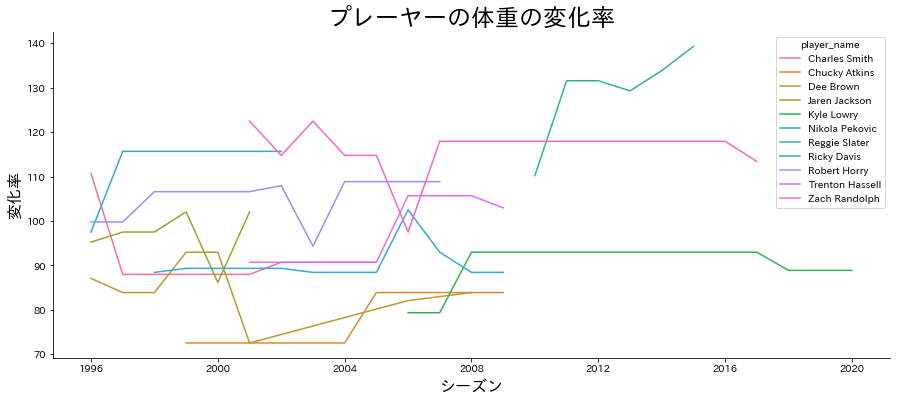

In [793]:
plt.figure(figsize=(15, 6))
sns.lineplot(x="season", y="weight", data=a, units='player_name', estimator=None, hue='player_name')
plt.title('プレーヤーの体重の変化率', fontsize=24)
plt.ylabel('変化率', fontsize=16)
plt.xlabel('シーズン', fontsize=16)
sns.despine()
plt.show()

## 🔴最適な身長と重量

In [794]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted,bmi
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996-01-01,1,29,71,...,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-01-01,1,23.415705
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992-01-01,2,50,6,...,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-01-01,1,23.983338
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,NaT,Undrafted,Undrafted,71,...,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-01-01,0,24.571864
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,NaT,Undrafted,Undrafted,74,...,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-01-01,0,25.003906
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996-01-01,1,25,42,...,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-01-01,1,25.182322


In [795]:
df = df[df['net_rating'] < 40]
df = df[df['net_rating'] > -20]
# 分割
df['height_bin'] = pd.qcut(df['player_height'], q=6)
df['weight_bin'] = pd.qcut(df['player_weight'], q=6)
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted,bmi,height_bin,weight_bin
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996-01-01,1,29,71,...,6.2,0.127,0.182,0.142,0.536,0.052,1996-01-01,1,23.415705,"(210.82, 231.14]","(99.79, 106.594]"
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992-01-01,2,50,6,...,-15.1,0.143,0.267,0.265,0.333,0.000,1996-01-01,1,23.983338,"(205.74, 210.82]","(99.79, 106.594]"
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,NaT,Undrafted,Undrafted,71,...,0.9,0.016,0.115,0.151,0.535,0.099,1996-01-01,0,24.571864,"(205.74, 210.82]","(99.79, 106.594]"
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,NaT,Undrafted,Undrafted,74,...,-9.0,0.083,0.152,0.167,0.542,0.101,1996-01-01,0,25.003906,"(205.74, 210.82]","(106.594, 113.398]"
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996-01-01,1,25,42,...,-14.5,0.109,0.118,0.233,0.482,0.114,1996-01-01,1,25.182322,"(200.66, 205.74]","(99.79, 106.594]"


### 2000年以前

In [796]:
fig = px.box(df.query('season > 2010'), y="net_rating", color="height_bin")
fig.show()

### 2000年以前

In [797]:
fig = px.box(df.query('season < 2000'), y="net_rating", color="height_bin")
fig.show()

In [798]:
df = df.query('season == 2019')
df = df.query('gp >= 10')
X = df[['player_height', 'player_weight', 'pts', 'reb', 'ast', 'net_rating']]
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
row_clusters = linkage(X_std,method='complete',metric='euclidean')

/var/folders/zf/jcszxh8555z_p9pqg0jz5mp00000gn/T/ipykernel_36288/2823778134.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/zf/jcszxh8555z_p9pqg0jz5mp00000gn/T/ipykernel_36288/2823778134.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator



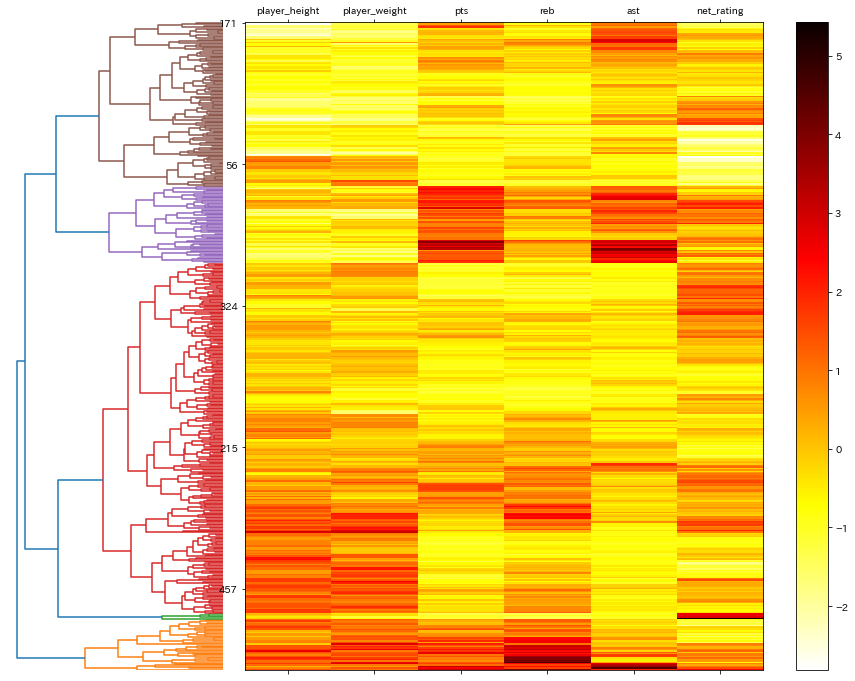

In [799]:
fig = plt.figure(figsize=(15,15), facecolor='white')
axd = fig.add_axes([0.01, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters,orientation='left')
df_rowclust = X_std.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust,
                  interpolation='nearest',
                  cmap='hot_r',
                  aspect='auto')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

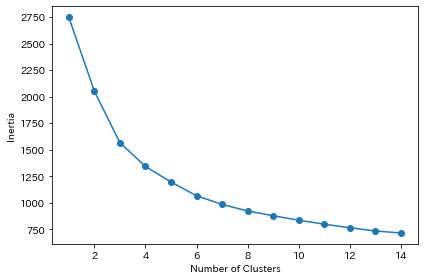

In [800]:
inertia = []
for i in range (1,15):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=42)
    km.fit(X_std)
    inertia.append(km.inertia_)
plt.plot(range(1,15), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

In [801]:
clusterer = KMeans(n_clusters=10,
                       n_init=100,
                       max_iter=500,
                       random_state=42)
cluster_labels = clusterer.fit_predict(X_std)
X['cluster'] = cluster_labels
X.groupby('cluster').mean().sort_values(by='reb',ascending=False)

/var/folders/zf/jcszxh8555z_p9pqg0jz5mp00000gn/T/ipykernel_36288/2464240565.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,player_height,player_weight,pts,reb,ast,net_rating
cluster,,,,,,
9,209.296000,116.119552,16.936000,10.528000,2.436000,0.736000
1,203.786154,105.652044,23.646154,7.815385,5.907692,8.276923
7,210.005283,111.814707,8.286792,5.460377,1.241509,1.715094
4,200.303509,99.822071,13.652632,4.977193,2.324561,-0.189474
5,190.817500,89.187527,19.852500,4.425000,5.747500,0.530000
3,205.515882,105.887050,5.370588,3.329412,0.941176,-6.626471
8,187.692632,85.466282,8.728070,2.498246,2.940351,0.105263
6,197.052464,94.406300,6.275362,2.489855,1.228986,-0.547826
2,197.785789,97.486470,4.152632,2.005263,0.794737,8.278947


# df_HW

In [802]:
df_HW = df[['team_abbreviation','age','player_height', 'player_weight','country']]
df_HW.head()

,team_abbreviation,age,player_height,player_weight,country
10631,TOR,26.0,185.42,89.357624,USA
10632,PHI,22.0,200.66,91.625584,Turkey
10634,BKN,34.0,195.58,88.450440,USA
10635,WAS,23.0,195.58,97.522280,USA
10636,ORL,25.0,198.12,102.058200,USA


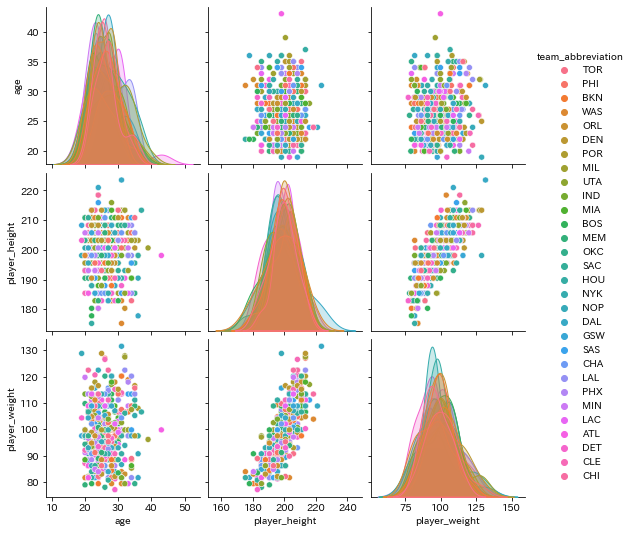

In [803]:
sns.pairplot(df_HW, hue='team_abbreviation')

### 偏差

In [804]:
# 身長
height_mean = df_HW['player_height'].mean()
height_diff = []
for n in df_HW['player_height']:
    height_diff.append(n-height_mean)
# 体重
weight_mean = df_HW['player_weight'].mean()
weight_diff = []
for n in df_HW['player_weight']:
    weight_diff.append(n-weight_mean)
HW_diff = pd.DataFrame({'身長偏差': height_diff, '体重偏差': weight_diff})
HW_diff.head()

,身長偏差,体重偏差
0,-13.637249,-9.467000
1,1.602751,-7.199040
2,-3.477249,-10.374184
3,-3.477249,-1.302344
4,-0.937249,3.233576


### 平均偏差

In [805]:
# 身長
height_mean = df_HW['player_height'].mean()
height_diff = []
for n in df_HW['player_height']:
    height_diff.append(abs(n-height_mean))
# 体重
weight_mean = df_HW['player_weight'].mean()
weight_diff = []
for n in df_HW['player_weight']:
    weight_diff.append(abs(n-weight_mean))
HW_diff = pd.DataFrame({'身長偏差': height_diff, '体重偏差': weight_diff})
HW_diff.head()

,身長偏差,体重偏差
0,13.637249,9.467000
1,1.602751,7.199040
2,3.477249,10.374184
3,3.477249,1.302344
4,0.937249,3.233576


### 変動係数（CV)

In [806]:
hegith_CV = variation(df_HW["player_height"])
weight_CV = variation(df_HW["player_weight"])
HW_CV = pd.DataFrame({'身長変動係数': hegith_CV, '体重変動係数': weight_CV},index=['1'])
HW_CV

,身長変動係数,体重変動係数
1,0.042449,0.109241


### まとめ

In [807]:
df_ = df_HW.loc[:,['player_height','player_weight']]
x_ = df_.columns.values
#最頻値
mode_stat_list = []
for x in x_:
    mode_stat = statistics.mode(df_[x])
    mode_stat_list.append(mode_stat)
#中央値
median_list = []
for x in x_:
    median = statistics.median(df_[x])
    median_list.append(median)
#平均値
mean_list = []
for x in x_:
    mean = round(statistics.mean(df_[x]),2)
    mean_list.append(mean)
#分散
variance_list = []
for x in x_:
    variance = round(statistics.pvariance(df_[x]),2)
    variance_list.append(variance)
#標準偏差
pstdev_list = []
for x in x_:
    pstdev = round(statistics.pstdev(df_[x]),2)
    pstdev_list.append(pstdev)
#歪度
skew_list = []
for x in x_:
    skew = round(df_[x].skew(),2)
    skew_list.append(skew)
#尖度
kurt_list = []
for x in x_:
    kurt = round(df_[x].kurt(),2)
    kurt_list.append(kurt)
heightWeight_s = pd.DataFrame(index=x_)
heightWeight_s['最頻値'] = mode_stat_list
heightWeight_s['中央値'] = median_list
heightWeight_s['平均値'] = mean_list
heightWeight_s['分散'] = variance_list
heightWeight_s['標準偏差'] = pstdev_list
heightWeight_s['歪度'] = skew_list
heightWeight_s['尖度'] = kurt_list
heightWeight_s = heightWeight_s.astype(str).T
heightWeight_s

,player_height,player_weight
最頻値,195.58,97.52228
中央値,198.12,97.52228
平均値,199.06,98.82
分散,71.4,116.55
標準偏差,8.45,10.8
歪度,-0.11,0.35
尖度,-0.29,-0.27


### 散布図

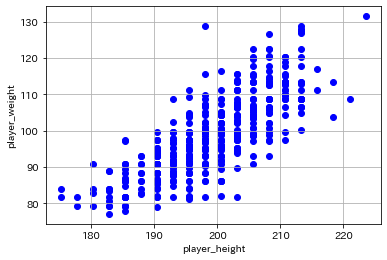

In [808]:
# 散布図を描く（plt.scatterを使ってみる）
plt.xlabel('player_height')
plt.ylabel('player_weight')
plt.scatter(df_HW["player_height"], df_HW["player_weight"], c='blue')
plt.grid(True)
plt.show()

## 単回帰分析

In [809]:
# 回帰分析のためのインスタンスをつくる
reg = linear_model.LinearRegression()
# データフレームを目的変数(y)、説明変数(X)に分ける。
X = df_HW.loc[:,["player_height"]]
y = df_HW.loc[:,["player_weight"]]
# 単回帰分析を実行する
reg.fit(X, y)

LinearRegression()

In [810]:
# 分析結果として、回帰係数（reg.coef_）、切片（reg.intercept_）を表示する
print(reg.coef_[0])
print(reg.intercept_[0])

[0.99643011]
-99.52201281988347


In [811]:
# 決定係数を計算する
reg.score(X, y)

0.608259902832841

### 🔴散布図と回帰直線

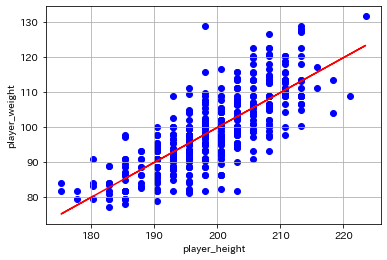

In [812]:
# 散布図と回帰直線を描画する
plt.xlabel('player_height')
plt.ylabel('player_weight')
plt.scatter(X, y, c='blue')
plt.plot(X, reg.predict(X), c='red')
plt.grid(True)
plt.show()

### 標準化

In [813]:
# 標準化の対象とする変数のリストを作成
columnList = ["player_height","player_weight"]
# 標準化を実施（結果は heightWeight_std とする）
scaler = StandardScaler()
scaler.fit( df_HW[columnList] )
df_HW_std = pd.DataFrame(scaler.transform(df_HW[columnList]), columns=columnList)
df_HW_std.head()

,player_height,player_weight
0,-1.613913,-0.876927
1,0.189679,-0.666846
2,-0.411518,-0.960959
3,-0.411518,-0.120636
4,-0.110920,0.299526


In [814]:
# 標準化前の各変数の要約統計量
df_HW.describe()

,age,player_height,player_weight
count,458.00000,458.000000,458.000000
mean,26.10917,199.057249,98.824624
std,4.07064,8.459045,10.807459
min,19.00000,175.260000,77.110640
25%,23.00000,193.040000,90.718400
50%,26.00000,198.120000,97.522280
75%,28.75000,205.740000,106.594120
max,43.00000,223.520000,131.541680


In [815]:
df_HW_std.describe()

,player_height,player_weight
count,4.580000e+02,4.580000e+02
mean,2.753741e-16,-4.053041e-16
std,1.001093e+00,1.001093e+00
min,-2.816307e+00,-2.011364e+00
25%,-7.121169e-01,-7.508785e-01
50%,-1.109196e-01,-1.206359e-01
75%,7.908764e-01,7.196874e-01
max,2.895067e+00,3.030577e+00


#### グラフ

##### 標準化前

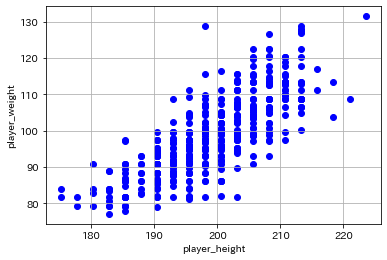

In [816]:
# 標準化前の散布図を描く
plt.xlabel('player_height')
plt.ylabel('player_weight')
plt.scatter(df_HW["player_height"], df_HW["player_weight"], c='blue')
plt.grid(True)
plt.show()

##### 標準化後

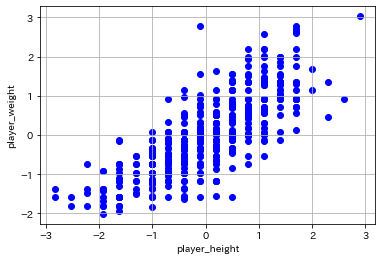

In [817]:
# 標準化後の散布図を描く
# 散布図を描く（plt.scatterを使ってみる）
plt.xlabel('player_height')
plt.ylabel('player_weight')
plt.scatter(df_HW_std["player_height"], df_HW_std["player_weight"], c='blue')
plt.grid(True)
plt.show()

### 単回帰分析

In [818]:
# 回帰分析のためのインスタンスをつくる
reg = linear_model.LinearRegression()

In [819]:
# 標準化された変数を基にデータフレームを目的変数(y)、説明変数(X)に分ける。
X_std = df_HW_std.loc[:,["player_height"]]
y_std = df_HW_std.loc[:,["player_weight"]]

In [820]:
# 単回帰分析を実行する
reg.fit(X_std, y_std)

LinearRegression()

In [821]:
# 分析結果として、回帰係数（reg.coef_）、切片（reg.intercept_）を表示する
print(reg.coef_[0])
print(reg.intercept_[0])

[0.77991019]
-6.200711886334586e-16


In [822]:
# 共分散行列を作成して、共分散を確認
print(np.cov( df_HW_std["player_height"], df_HW_std["player_weight"], bias=True))
# 相関係数を確認
print( sp.stats.pearsonr(df_HW_std["player_height"], df_HW_std["player_weight"]) )

[[1.         0.77991019]
 [0.77991019 1.        ]]
(0.7799101889530878, 7.640406364503226e-95)


In [823]:
# 決定係数を計算する
reg.score(X_std, y_std)

0.608259902832841

### 散布図と回帰直線

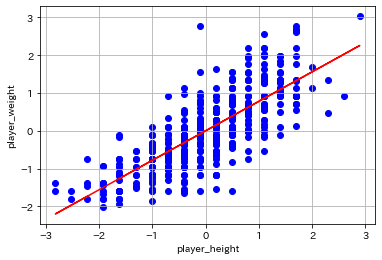

In [824]:
# 散布図と回帰直線を描画する
plt.xlabel('player_height')
plt.ylabel('player_weight')
plt.scatter(X_std, y_std, c='blue')
plt.plot(X_std, reg.predict(X_std), c='red')
plt.grid(True)
plt.show()